A Time-Series represents a series of time-based orders. It would be Years, Months, Weeks, Days, Horus, Minutes, and Seconds.
A time series is an observation from the sequence of discrete-time of successive intervals.
A time series is a running chart.
The time variable/feature is the independent variable and supports the target variable to predict the results.
Time Series Analysis (TSA) is used in different fields for time-based predictions – like Weather Forecasting, Financial, Signal processing, Engineering domain – Control Systems, Communications Systems.
Since TSA involves producing the set of information in a particular sequence, it makes a distinct from spatial and other analyses.
Using AR, MA, ARMA, and ARIMA models, we could predict the future.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os
train_df = pd.read_csv('train_timeseries.csv', sep = ',')
test_df = pd.read_csv('test_time_series.csv')

In [4]:
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


Text(0.5, 1.0, '\nBasic Time Series of Sales\n')

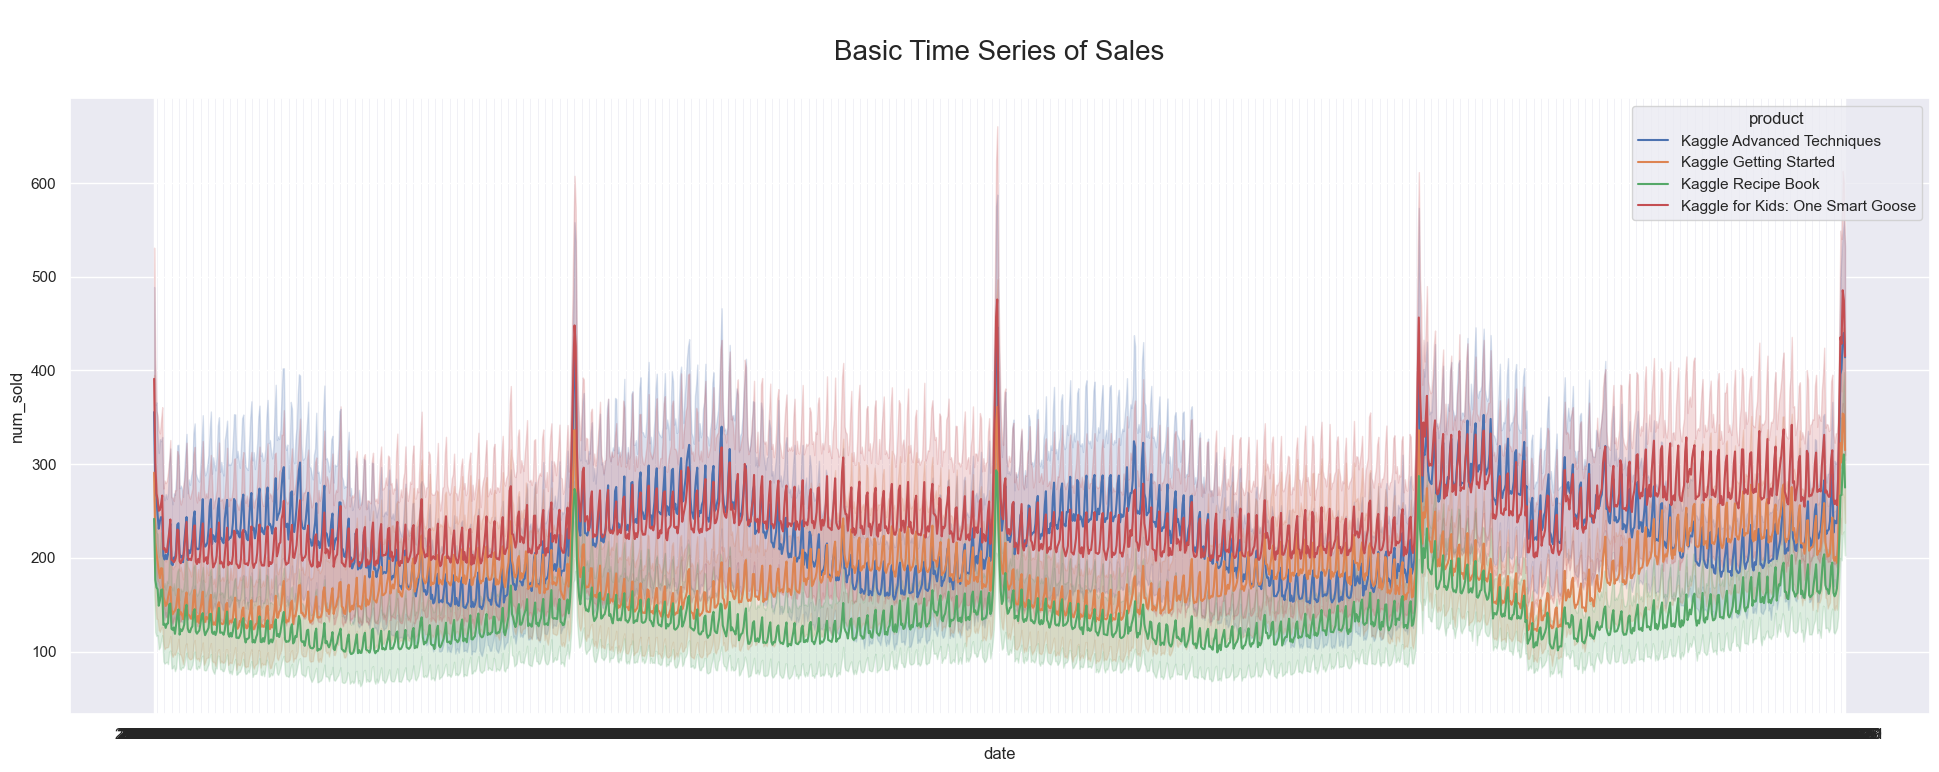

In [5]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=train_df, x = 'date', y = 'num_sold', hue = 'product')
ax.axes.set_title("\nBasic Time Series of Sales\n", fontsize = 20)

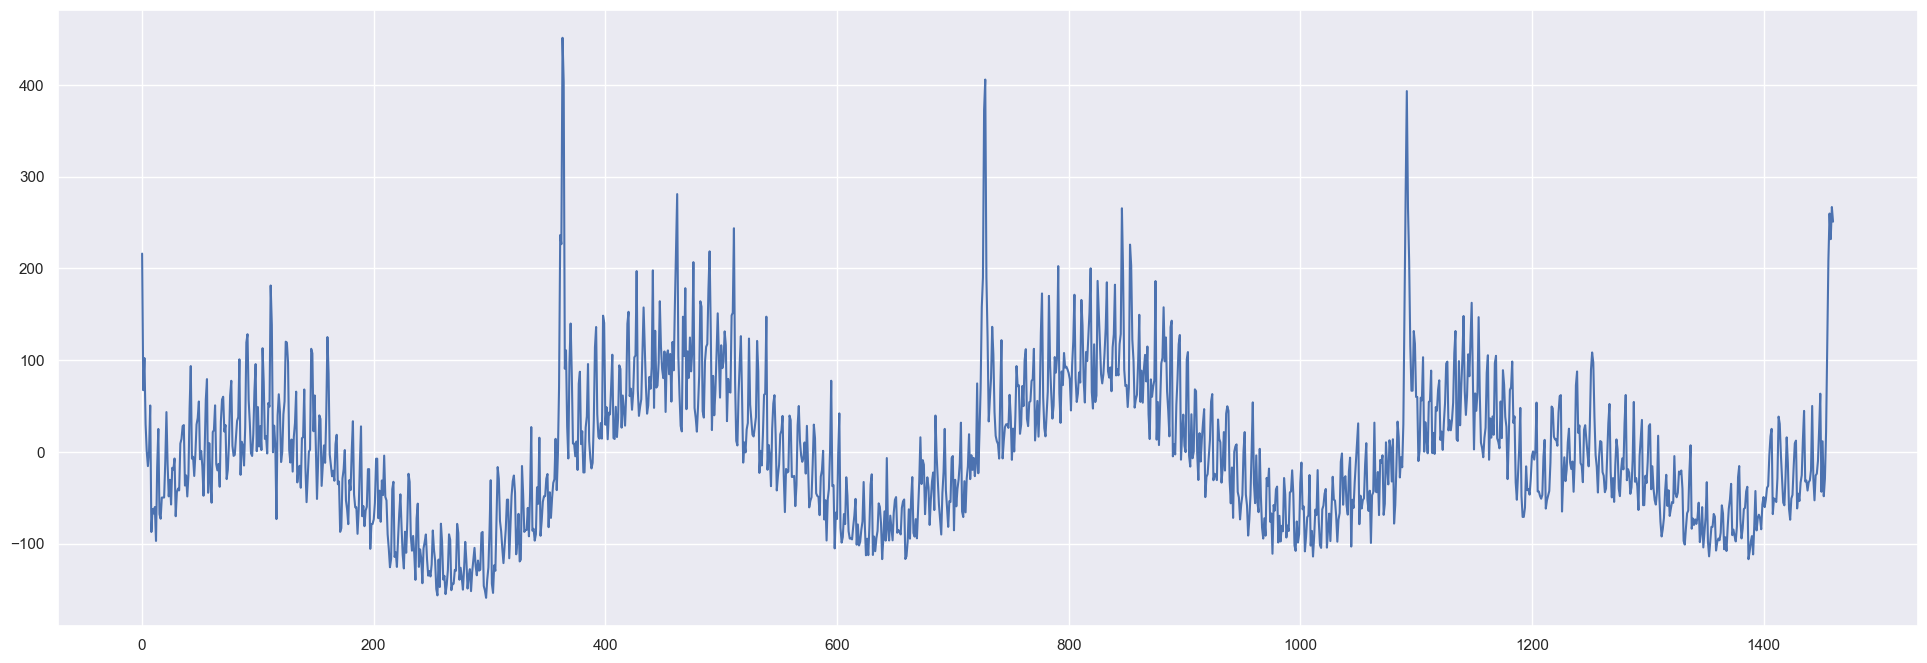

In [6]:
from scipy import signal
df = train_df[(train_df['country'] == 'Belgium')&(train_df['product'] == 'Kaggle Advanced Techniques') & (train_df['store'] == 'KaggleMart')]
detrended = signal.detrend(df.num_sold.values)
plt.plot(detrended)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 70080
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    1461 non-null   int64 
 1   date      1461 non-null   object
 2   country   1461 non-null   object
 3   store     1461 non-null   object
 4   product   1461 non-null   object
 5   num_sold  1461 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 79.9+ KB


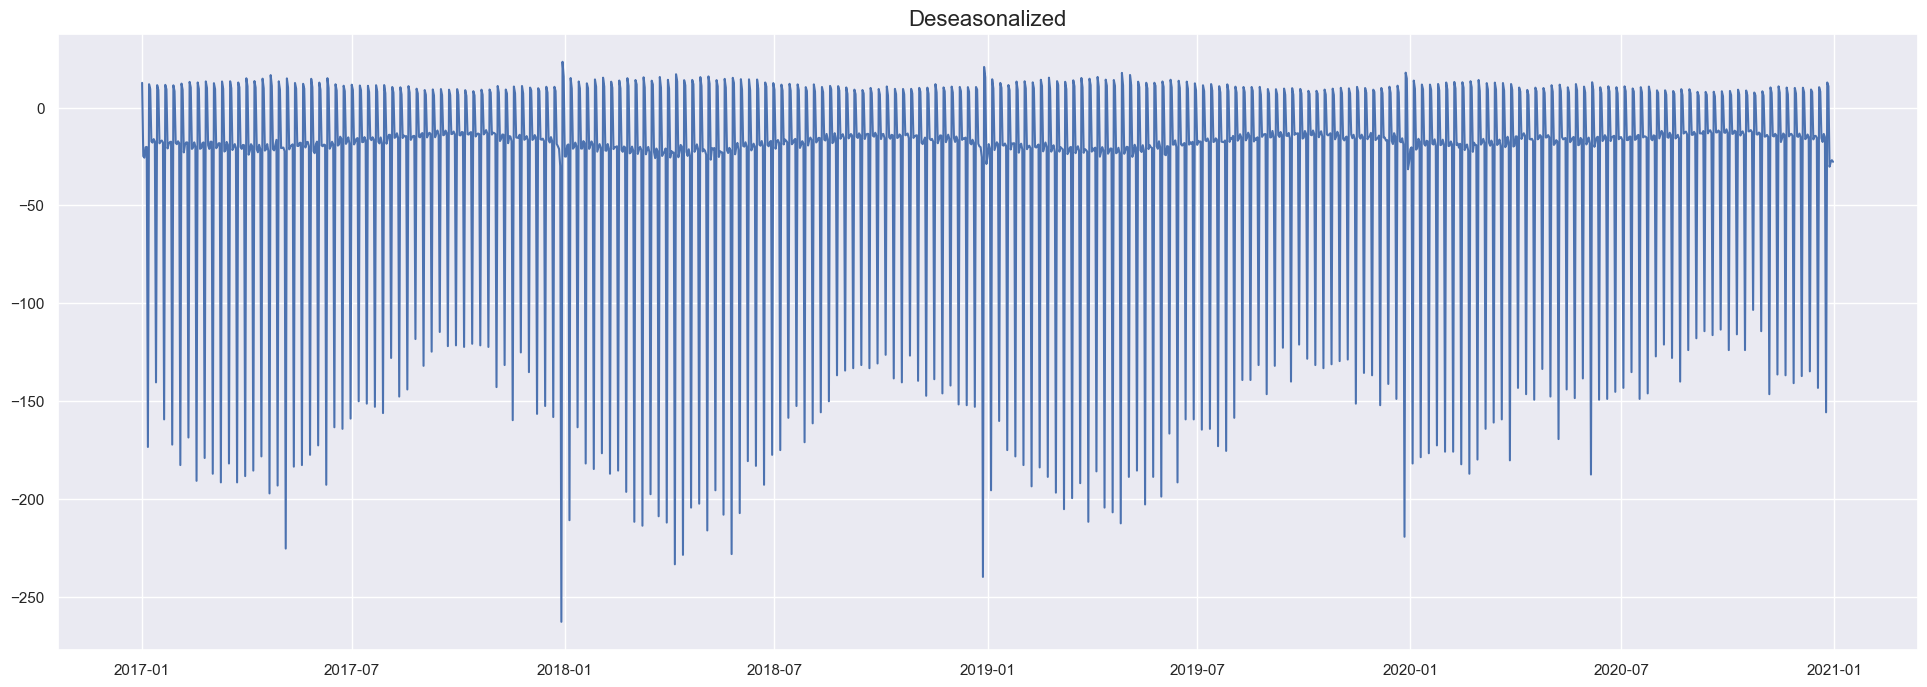

In [8]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['num_sold'], model = 'additive', extrapolate_trend='freq')
deseasonalized = df.num_sold.values / result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize = 16)
plt.plot()
print(result_mul)

[]

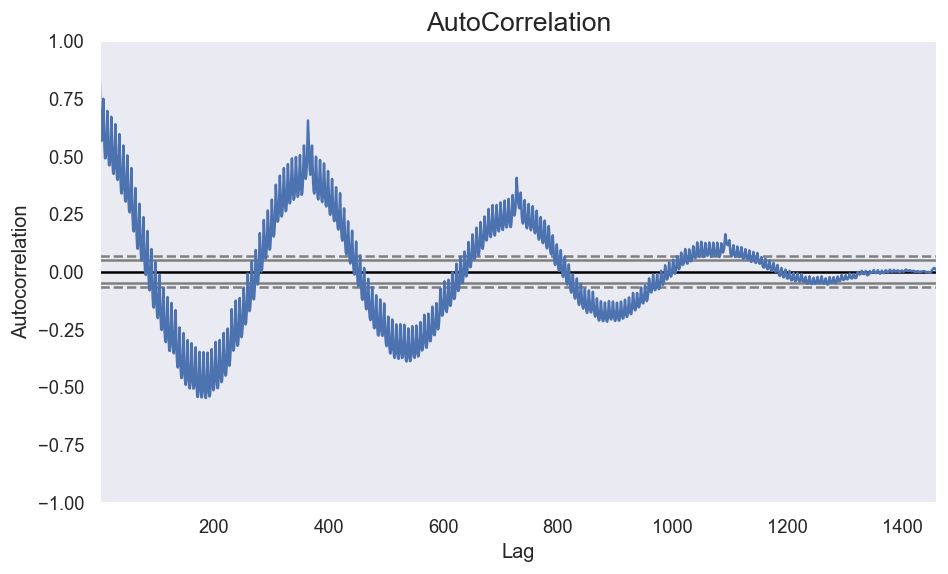

In [9]:
from pandas.plotting import autocorrelation_plot
df = train_df[(train_df['country'] == 'France')&(train_df['product'] == 'Kaggle Advanced Techniques') & (train_df['store'] == 'KaggleMart')]
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.num_sold.tolist())
plt.title('AutoCorrelation', fontsize = 16)
plt.plot()

Text(0.5, 1.0, '\nSales of Kaggle Advanced Techniques on KaggleMart in Belgium\n')

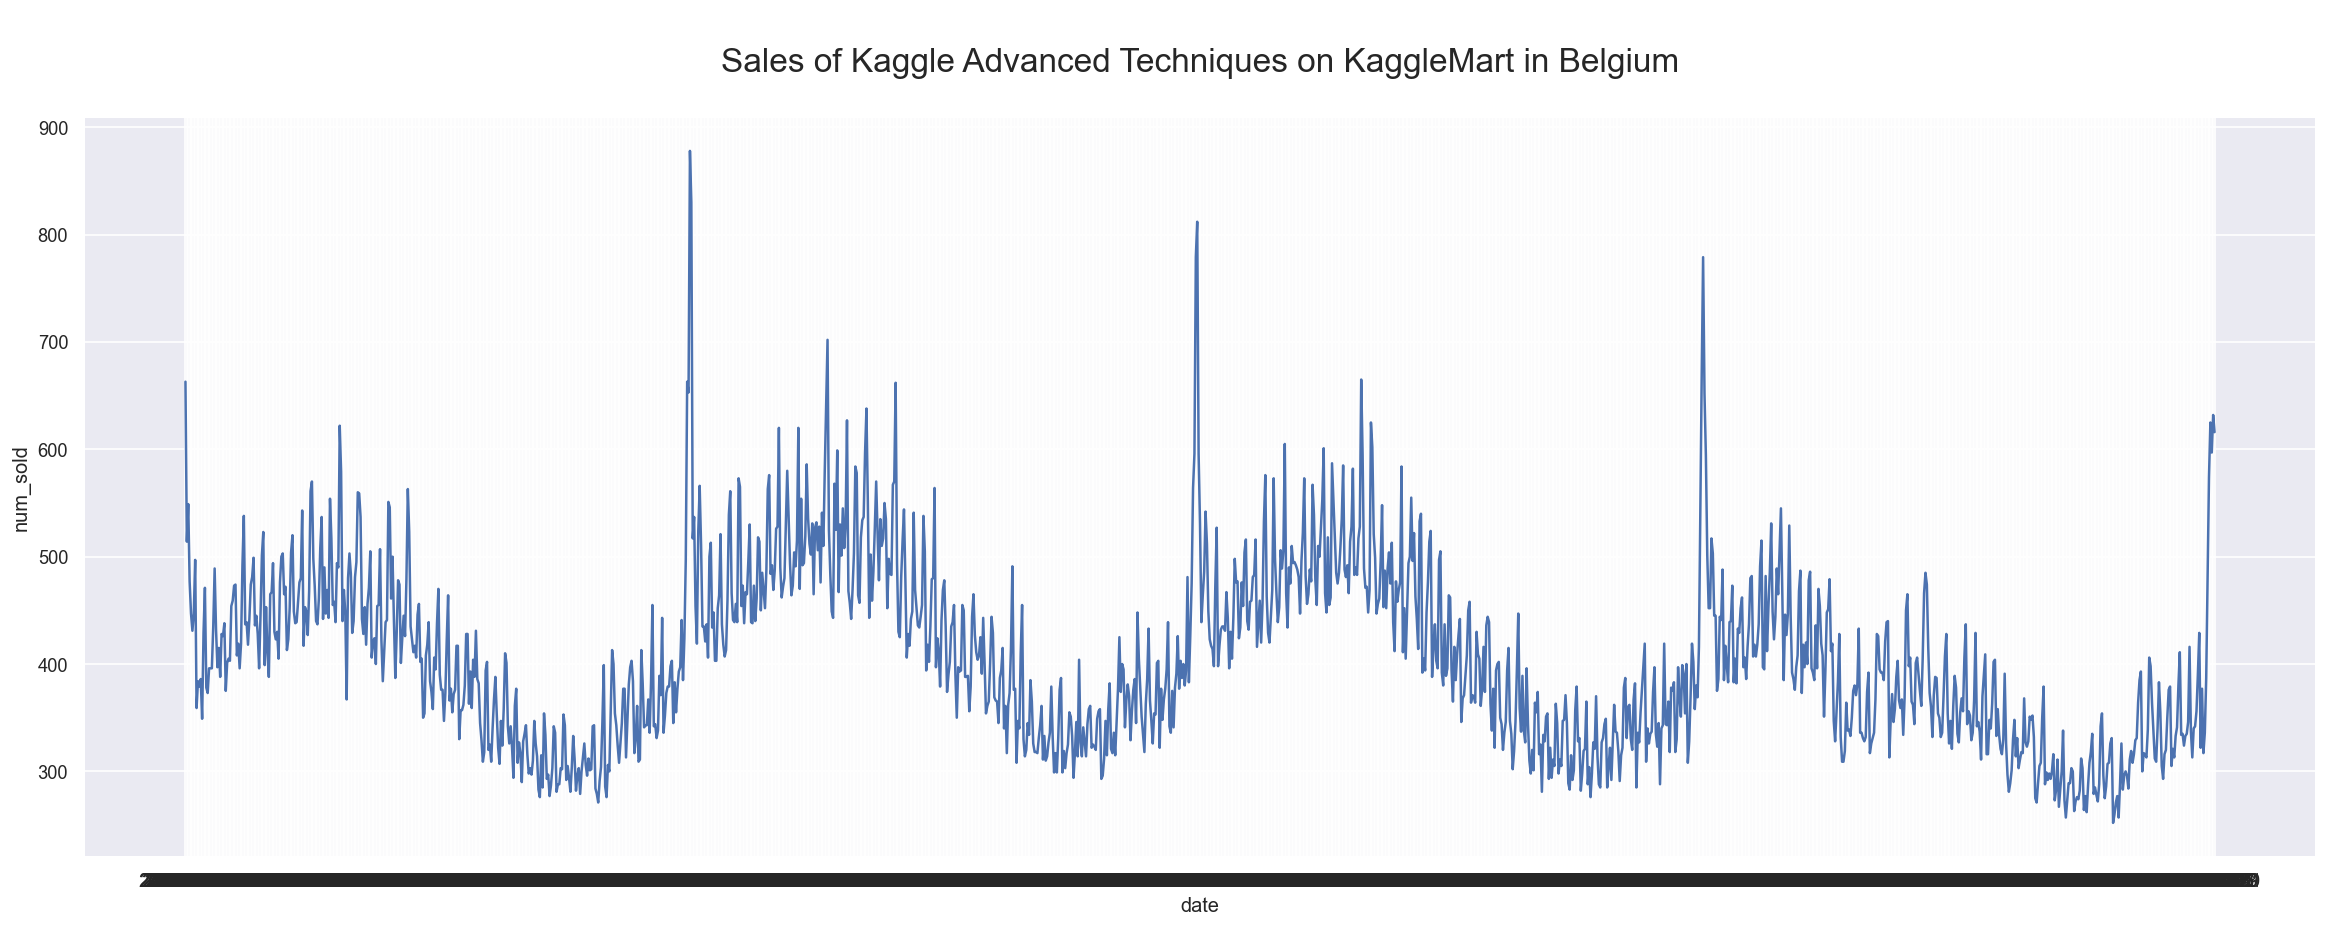

In [10]:
df = train_df[(train_df['country'] == 'Belgium')&(train_df['product'] == 'Kaggle Advanced Techniques') & (train_df['store'] == 'KaggleMart')]
sns.set({'figure.figsize' : (24,8)})
ax = sns.lineplot(data = df, x = 'date', y = 'num_sold')
ax.axes.set_title("\nSales of Kaggle Advanced Techniques on KaggleMart in Belgium\n",fontsize=20)

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.num_sold.values, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.7177853359031627
p-value: 0.07101086977865066
Critial Values:
   1%, -3.4349056408696814
Critial Values:
   5%, -2.863552005375758
Critial Values:
   10%, -2.5678411776130114


In [12]:
from statsmodels.tsa.stattools import kpss
result = kpss(df.num_sold.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.887170
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


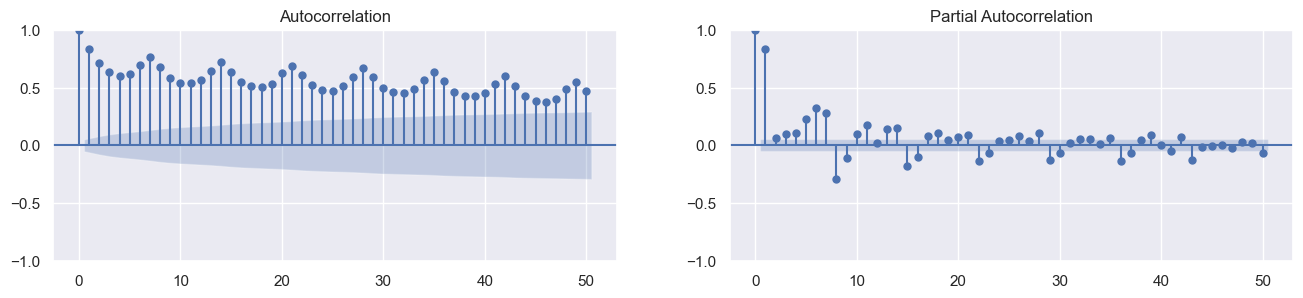

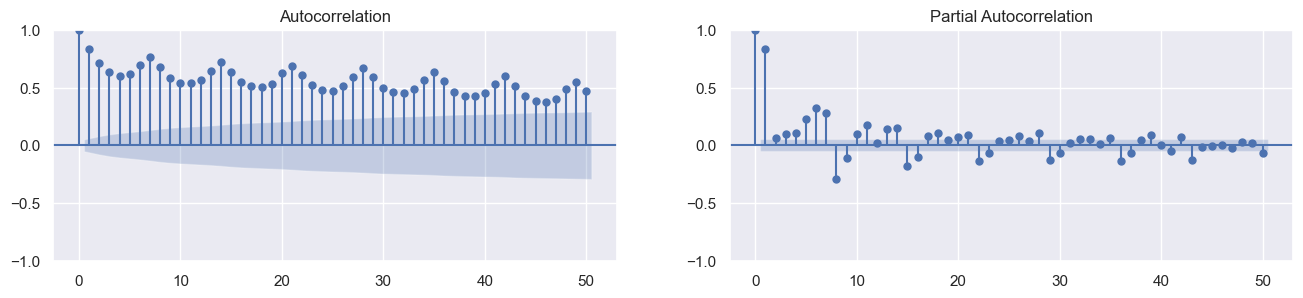

In [13]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = train_df[(train_df['country'] == 'Belgium')&(train_df['product'] == 'Kaggle Advanced Techniques') & (train_df['store'] == 'KaggleMart')]
df['value'] = df['num_sold']
acf_50 = acf(df.value, nlags = 50)
pacf_50 = pacf(df.value, nlags = 50)
fig, axes = plt.subplots(1, 2, figsize = (16, 3), dpi = 100)
plot_acf(df.value.tolist(), lags = 50, ax = axes[0])
plot_pacf(df.value.tolist(), lags = 50, ax = axes[1])

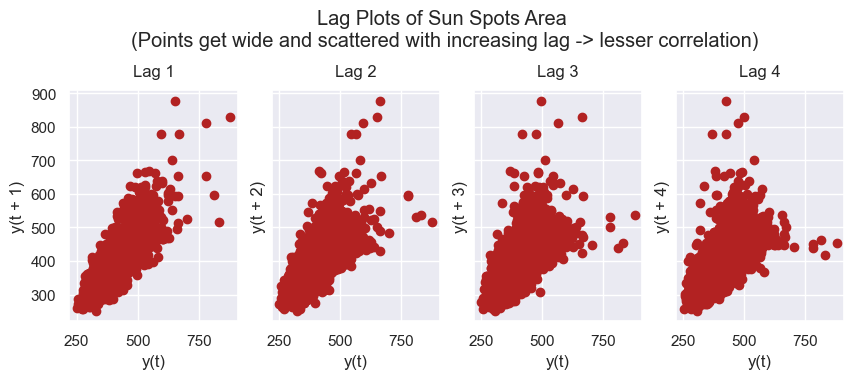

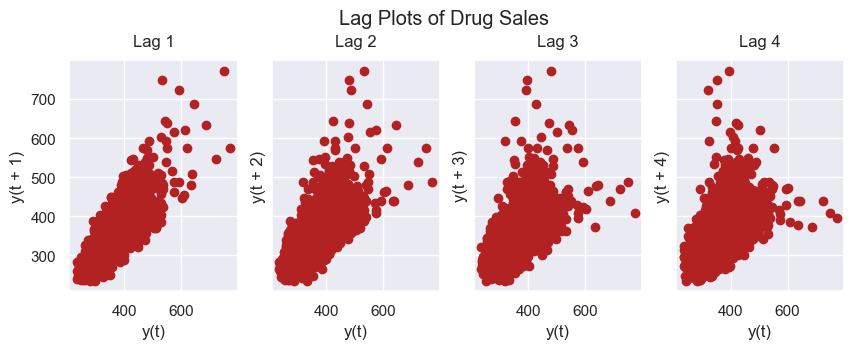

In [14]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


ss = train_df[(train_df['country']=='Belgium')&(train_df['product']=='Kaggle Advanced Techniques')&(train_df['store']=='KaggleMart')]
ss['value']=ss['num_sold']
a10 = train_df[(train_df['country']=='France')&(train_df['product']=='Kaggle Advanced Techniques')&(train_df['store']=='KaggleMart')]
a10['value']=a10['num_sold']

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

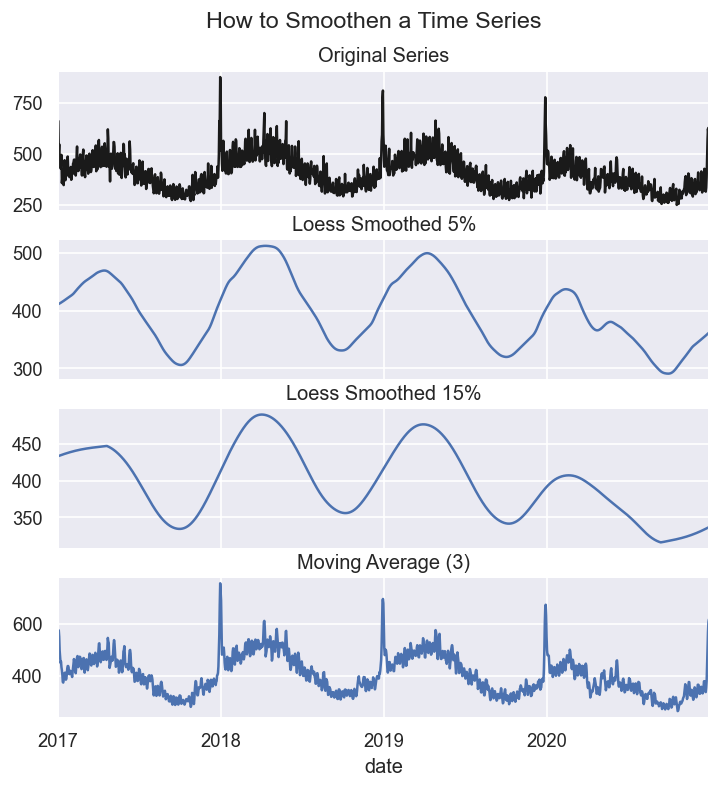

In [15]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df = train_df[(train_df['country']=='Belgium')&(train_df['product']=='Kaggle Advanced Techniques')&(train_df['store']=='KaggleMart')]
df['value']=df['num_sold']
df=df.set_index('date')
df.index = pd.to_datetime(df.index)

df_orig=df.copy()

df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()


df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

In [16]:
df = train_df[(train_df['country']=='Belgium')&(train_df['product']=='Kaggle Advanced Techniques')&(train_df['store']=='KaggleMart')]
series=pd.DataFrame()
series['value']=df['num_sold']
series=series.set_index(df['date'])
series.index = pd.to_datetime(series.index)

series.head()

,value
date,
2017-01-01,663
2017-01-02,514
2017-01-03,549
2017-01-04,477
2017-01-05,447


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1461
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7515.898
Date:                Tue, 20 Sep 2022   AIC                          15043.797
Time:                        09:17:27   BIC                          15075.514
Sample:                    01-01-2017   HQIC                         15055.628
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.020    -16.123      0.000      -0.358      -0.280
ar.L2         -0.3069      0.016    -18.621      0.000      -0.339      -0.275
ar.L3         -0.2861      0.023    -12.613      0.0

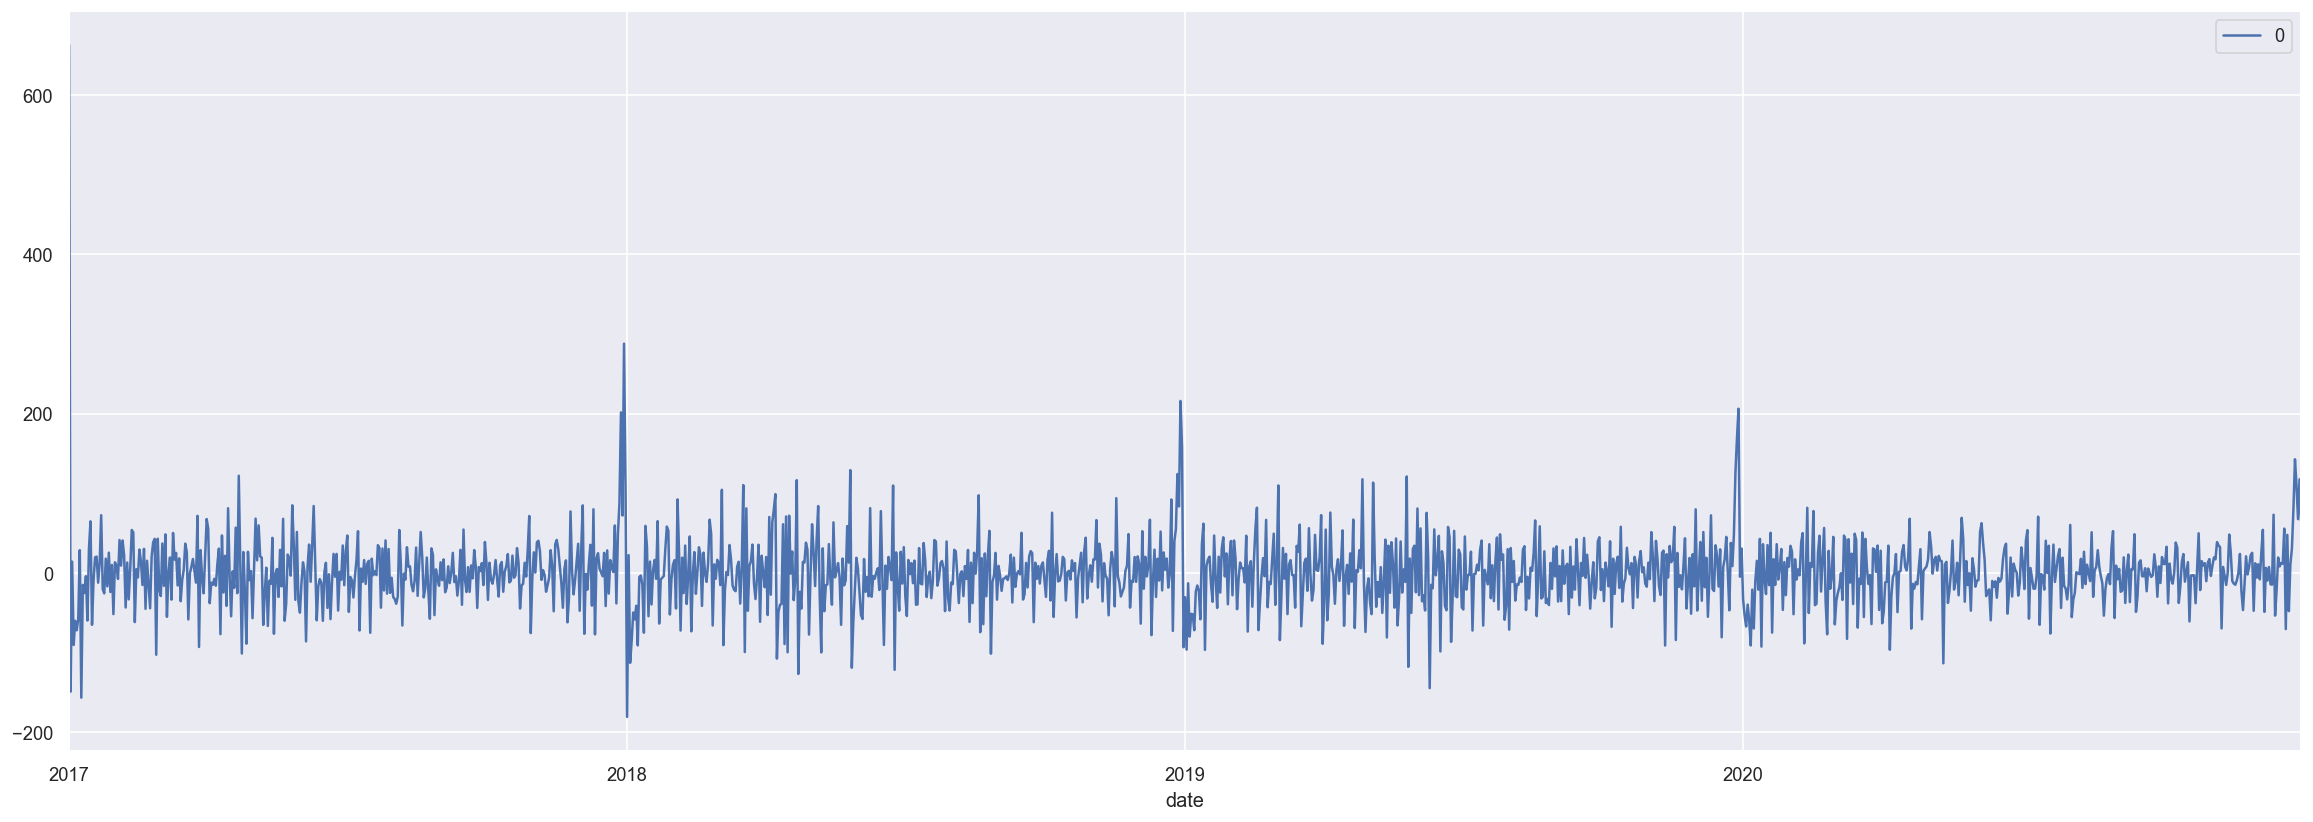

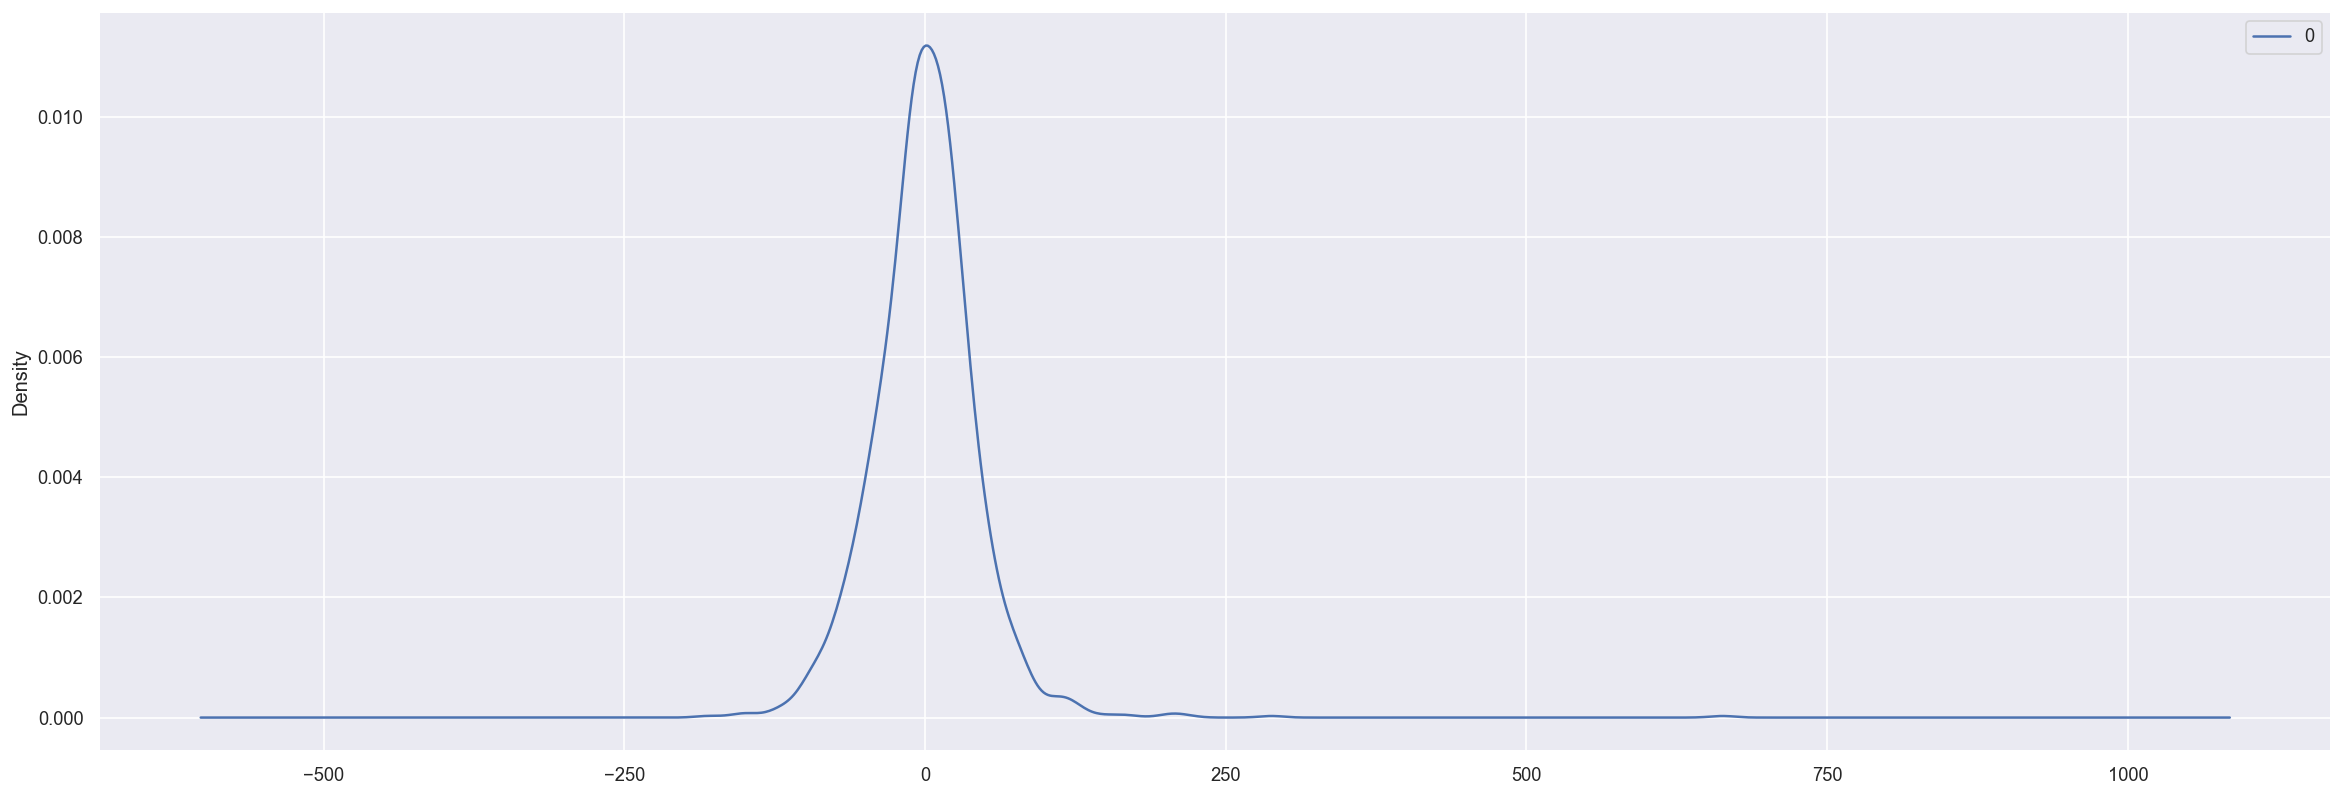

                 0
count  1461.000000
mean      0.388641
std      45.151376
min    -180.506780
25%     -23.286517
50%       0.017556
75%      23.277979
max     663.000000


In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order = (5,1,0))
model_fit = model.fit()
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind = 'kde')
plt.show()
print(residuals.describe())